In [2]:
import os
import cv2
import xml.etree.ElementTree as ET
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers



In [33]:
# Function to parse XML annotations
def parse_annotations(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    image_path = os.path.join(root.find('folder').text, root.find('filename').text)
    labels = [obj.find('name').text for obj in root.findall('object')]
    return image_path, labels
print(image_path, labels)


images\BikesHelmets99.png ['With Helmet', 'Without Helmet', 'Without Helmet', 'With Helmet']


In [4]:

# Function to load and preprocess images
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  
    image = image / 255.0  # Normalisation 
    return image

In [5]:
# Load and preprocess data
data = []
annotations_folder = 'C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/annotations'
for annotation_file in os.listdir(annotations_folder):
    annotation_path = os.path.join(annotations_folder, annotation_file)
    image_path, labels = parse_annotations(annotation_path)
    image = load_and_preprocess(image_path)
    helmet_label = 1 if 'With Helmet' in labels else 0
    data.append((image, helmet_label))


In [6]:
# Split data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)


In [7]:

# Convert data to NumPy arrays
train_images, train_labels = zip(*train_data)
val_images, val_labels = zip(*val_data)

train_images = np.array(train_images)
val_images = np.array(val_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)


In [8]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),  #convertit les données en un vecteur unidimensionnel
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [18]:
# Train the model
model.fit(train_images, train_labels, epochs=30, validation_data=(val_images, val_labels))


Epoch 1/30
20/20 [==============================] - 22s 1s/step - loss: 0.2629 - accuracy: 0.9280 - val_loss: 0.8075 - val_accuracy: 0.7320
Epoch 2/30
20/20 [==============================] - 22s 1s/step - loss: 0.2337 - accuracy: 0.9476 - val_loss: 0.9143 - val_accuracy: 0.7320
Epoch 3/30
20/20 [==============================] - 19s 930ms/step - loss: 0.2139 - accuracy: 0.9656 - val_loss: 0.8453 - val_accuracy: 0.7451
Epoch 4/30
20/20 [==============================] - 18s 920ms/step - loss: 0.2066 - accuracy: 0.9705 - val_loss: 0.9382 - val_accuracy: 0.7386
Epoch 5/30
20/20 [==============================] - 19s 951ms/step - loss: 0.1990 - accuracy: 0.9771 - val_loss: 1.1210 - val_accuracy: 0.7320
Epoch 6/30
20/20 [==============================] - 22s 1s/step - loss: 0.1928 - accuracy: 0.9820 - val_loss: 0.9920 - val_accuracy: 0.7451
Epoch 7/30
20/20 [==============================] - 23s 1s/step - loss: 0.1953 - accuracy: 0.9722 - val_loss: 0.9981 - val_accuracy: 0.7451
Epoch 8/30


In [34]:
#evaluate the model
test_loss, test_acc = model.evaluate(val_images, val_labels, verbose=2)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


5/5 - 1s - loss: 1.3059 - accuracy: 0.7451 - 782ms/epoch - 156ms/step

Test accuracy: 0.7450980544090271

Test loss: 1.305871844291687


In [27]:
# Save the model
model.save('helmet_detection_model.h5')


c:\Users\alaal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import cv2
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 45ms/step


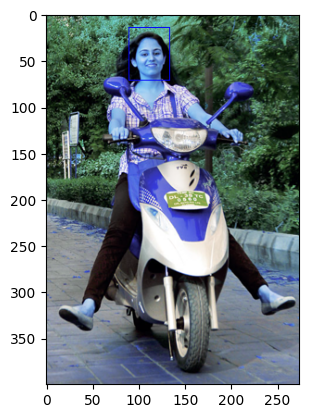

======>>> Without Helmet <<<======


In [31]:


# Make predictions on new images
new_image_path = 'C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/images/BikesHelmets479.png'
new_image = load_and_preprocess(new_image_path)
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
prediction = model.predict(new_image)



img = cv2.imread("C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/images/BikesHelmets479.png")
dh, dw, _ = img.shape

fl = open("C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/labels/BikesHelmets479.txt", 'r')
data = fl.readlines()
fl.close()

for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))

    # Get coordinate
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()

if prediction > 0.5:
    print('======>>> With Helmet <<<======')
else:
    print('======>>> Without Helmet <<<======')

In [15]:
# Make predictions on new images
new_image_path = 'C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/images/img1.jpg'
new_image = load_and_preprocess(new_image_path)
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
prediction = model.predict(new_image)


if prediction > 0.5:
    print('======>>> With Helmet <<<======')
else:
    print('======>>> Without Helmet <<<======')

1/1 [==============================] - 0s 65ms/step
======>>> With Helmet <<<======


1/1 [==============================] - 0s 80ms/step


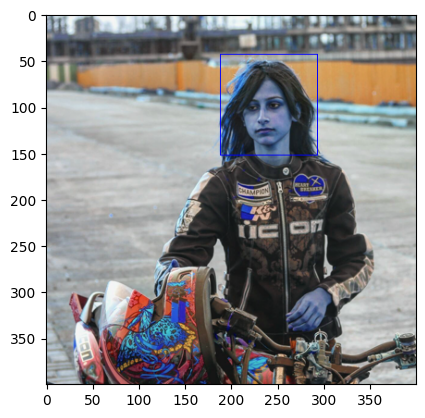

======>>> Without Helmet <<<======


In [37]:


# Make predictions on new images
new_image_path = 'C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/images/BikesHelmets730.png'
new_image = load_and_preprocess(new_image_path)
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension
prediction = model.predict(new_image)



img = cv2.imread("C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/images/BikesHelmets730.png")
dh, dw, _ = img.shape

fl = open("C:/Users/alaal/Desktop/DL-Project/Helmet-Detection-using-YOLO/labels/BikesHelmets730.txt", 'r')
data = fl.readlines()
fl.close()

for dt in data:

    # Split string to float
    _, x, y, w, h = map(float, dt.split(' '))

    # Get coordinate
    l = int((x - w / 2) * dw)
    r = int((x + w / 2) * dw)
    t = int((y - h / 2) * dh)
    b = int((y + h / 2) * dh)
    
    if l < 0:
        l = 0
    if r > dw - 1:
        r = dw - 1
    if t < 0:
        t = 0
    if b > dh - 1:
        b = dh - 1

    cv2.rectangle(img, (l, t), (r, b), (0, 0, 255), 1)

plt.imshow(img)
plt.show()

if prediction > 0.5:
    print('======>>> With Helmet <<<======')
else:
    print('======>>> Without Helmet <<<======')